In [1]:
# Capstone: NFTs
## Part III: EDA

### 1. Import Libraries

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#plotly imports
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import datetime

from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

### 2. Read In & Inspect Data

In [195]:
stats = pd.read_csv('../data/stats.csv')
types = pd.read_csv('../data/type.csv')
accessory = pd.read_csv('../data/clean_accessory.csv')

trans = pd.read_csv('../data/clean_transactions.csv')
indiv = pd.read_csv('../data/clean_individual.csv')
rarity = pd.read_csv('../data/clean_rarity.csv')
neareast_neighbors = pd.read_csv('../data/clean_nearest_neighbors.csv')

**Stats Dataset**

In [4]:
# round amount to four decimal places
stats['amount'] = np.round(stats['amount'], 4)

stats.head()

,stat,amount
0,one_day_volume,592.4900
1,one_day_change,-0.5166
2,one_day_sales,6.0000
3,one_day_average_price,98.7483
4,seven_day_volume,9473.1200


In [5]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stat    21 non-null     object 
 1   amount  20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 464.0+ bytes


In [6]:
stats.isnull().sum()

stat      0
amount    1
dtype: int64

**Type Dataset**

In [7]:
types

,type,amount,rarity
0,ape,24,0.0024
1,female,3840,0.3840
2,zombie,88,0.0088
3,alien,9,0.0009
4,male,6039,0.6039


In [8]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    5 non-null      object 
 1   amount  5 non-null      int64  
 2   rarity  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [9]:
types.describe()

,amount,rarity
count,5.000000,5.00000
mean,2000.000000,0.20000
std,2793.900589,0.27939
min,9.000000,0.00090
25%,24.000000,0.00240
50%,88.000000,0.00880
75%,3840.000000,0.38400
max,6039.000000,0.60390


**Accessory Dataset**

In [10]:
accessory.head()

,accessory,amount,rarity,rarity_score
0,3d glasses,286,0.0286,34.965035
1,bandana,481,0.0481,20.790021
2,beanie,44,0.0044,227.272727
3,big beard,146,0.0146,68.493151
4,big shades,535,0.0535,18.691589


In [11]:
accessory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accessory     87 non-null     object 
 1   amount        87 non-null     int64  
 2   rarity        87 non-null     float64
 3   rarity_score  87 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.8+ KB


In [12]:
accessory.describe()

,amount,rarity,rarity_score
count,87.000000,87.000000,87.000000
mean,316.540230,0.031654,52.011836
std,289.823996,0.028982,42.796974
min,44.000000,0.004400,4.066694
25%,147.500000,0.014750,24.010469
50%,272.000000,0.027200,36.764706
75%,416.500000,0.041650,67.797389
max,2459.000000,0.245900,227.272727


**Individual CryptoPunk Info Dataset**

**Rarity CryptoPunk Info Dataset**

**Transaction Dataset**

### 3. Analyze Stats Info

### 4. Analyze Type Info

In [13]:
types

,type,amount,rarity
0,ape,24,0.0024
1,female,3840,0.3840
2,zombie,88,0.0088
3,alien,9,0.0009
4,male,6039,0.6039


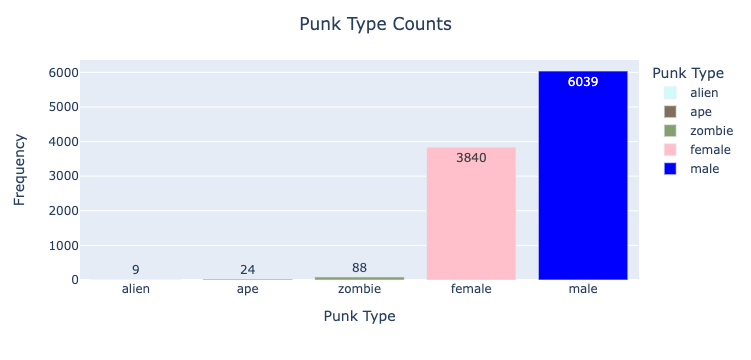

In [59]:
# sorted type dataframe
type_sorted = types.sort_values(by = 'amount')

# bar plot of punk type counts
fig = px.bar(type_sorted, 
             x=type_sorted['type'],
             y= type_sorted['amount'],
             text = type_sorted['amount'],
             color = 'type',
             color_discrete_map = {'alien':'#d2fafa', 'ape':'#817059', 'zombie':'#84a06f', 'female':'pink', 'male':'blue'},
             labels={'type': 'Punk Type', 'amount': 'Frequency'})
fig.update_layout(title = 'Punk Type Counts', title_x=.5)
fig.show()

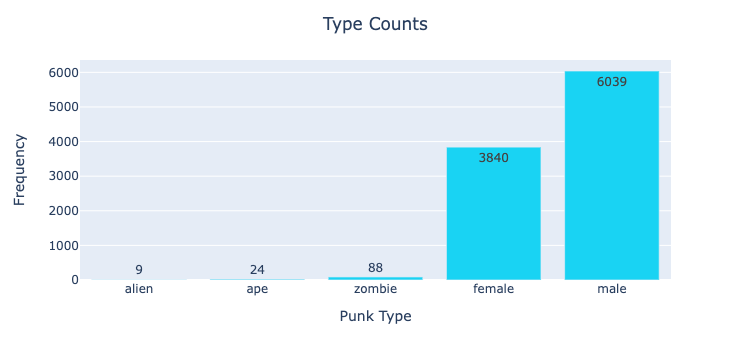

In [60]:
# sorted type dataframe
type_sorted = types.sort_values(by = 'amount')

# bar plot of punk type counts
fig = px.bar(type_sorted, 
             x=type_sorted['type'],
             y= type_sorted['amount'],
             text = type_sorted['amount'],
             color_discrete_sequence = ['#19d3f3'],
             labels={'type': 'Punk Type', 'amount': 'Frequency'})
fig.update_layout(title = 'Type Counts', title_x=.5)
fig.show()

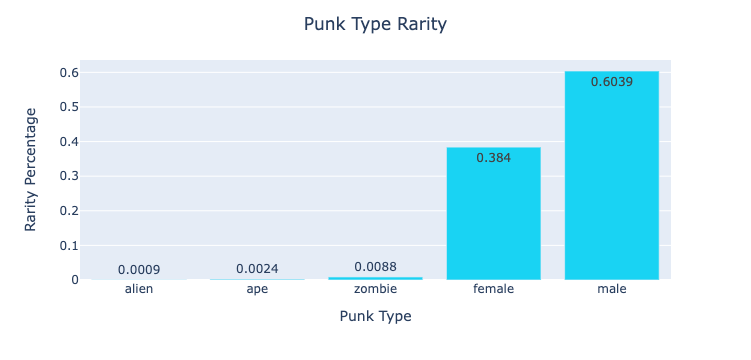

In [58]:
# sorted type dataframe
type_sorted = types.sort_values(by = 'amount')

# bar plot of punk type counts
fig = px.bar(type_sorted, 
             x=type_sorted['type'],
             y= type_sorted['rarity'],
             text = type_sorted['rarity'],
             color_discrete_sequence = ['#19d3f3'],
             labels={'type': 'Punk Type', 'rarity': 'Rarity Percentage'})
fig.update_layout(title = 'Punk Type Rarity', title_x=.5)
fig.show()

In [18]:
alien_df = indiv[indiv['type'] == 'alien']
alien_df['avg_usd_sale'].mean()

nan

In [19]:
ape_df = indiv[indiv['type'] == 'ape']
ape_df['avg_usd_sale'].mean()

4605.0

In [20]:
ape_df['recent_usd_sale'].mean()

4605.0

In [21]:
ape_df

,punk_id,type,accessories,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,...,total_withdrawn_bids,avg_usd_bid,max_usd_bid,total_offers,total_withdrawn_offers,avg_usd_offer,max_usd_offer,total_transfers,recent_usd_sale,rarity_score
372,372,ape,['Cap Forward'],0,0,0,0,0,0,0,...,2.0,1246.770333,2070.000,0.0,0.0,NaN,NaN,0.0,NaN,902.733442
1021,1021,ape,"['Cap', 'Eye Patch']",0,0,0,0,0,0,0,...,0.0,0.311000,0.311,0.0,0.0,NaN,NaN,1.0,NaN,886.324325
2140,2140,ape,"['Knitted Cap', 'Small Shades']",0,0,0,0,0,0,0,...,2.0,0.771750,1.365,1.0,0.0,5770.000000,5770.0,0.0,3760.0,886.463697
2243,2243,ape,"['Bandana', 'Nerd Glasses']",0,1,0,0,0,0,0,...,4.0,2790.144400,6430.000,0.0,0.0,NaN,NaN,1.0,NaN,874.414860
2386,2386,ape,"['Headband', 'Small Shades']",0,0,0,0,0,0,0,...,0.0,10.442500,20.574,0.0,0.0,NaN,NaN,0.0,NaN,887.227890
2460,2460,ape,"['Bandana', 'VR']",0,1,0,0,0,0,0,...,0.0,0.311000,0.311,0.0,0.0,NaN,NaN,0.0,NaN,887.052825
2491,2491,ape,['Cap'],0,0,0,0,0,0,0,...,1.0,1185.155500,2370.000,0.0,0.0,NaN,NaN,1.0,NaN,891.853392
2711,2711,ape,"['Cap Forward', 'Earring']",0,0,0,0,0,0,0,...,0.0,0.311000,0.311,0.0,0.0,NaN,NaN,0.0,NaN,879.579095
2924,2924,ape,['Hoodie'],0,0,0,0,0,0,0,...,4.0,1222.612400,2410.000,0.0,0.0,NaN,NaN,0.0,NaN,901.973402
4156,4156,ape,['Bandana'],0,1,0,0,0,0,0,...,0.0,0.104003,0.311,0.0,0.0,NaN,NaN,0.0,NaN,884.153384


In [22]:
zombie_df = indiv[indiv['type'] == 'zombie']
zombie_df['avg_usd_sale'].mean()

2315.9106428571426

In [23]:
female_df = indiv[indiv['type'] == 'female']
female_df['avg_usd_sale'].mean()

478.0636207617703

In [24]:
male_df = indiv[indiv['type'] == 'male']
male_df['avg_usd_sale'].mean()

226.47906066615582

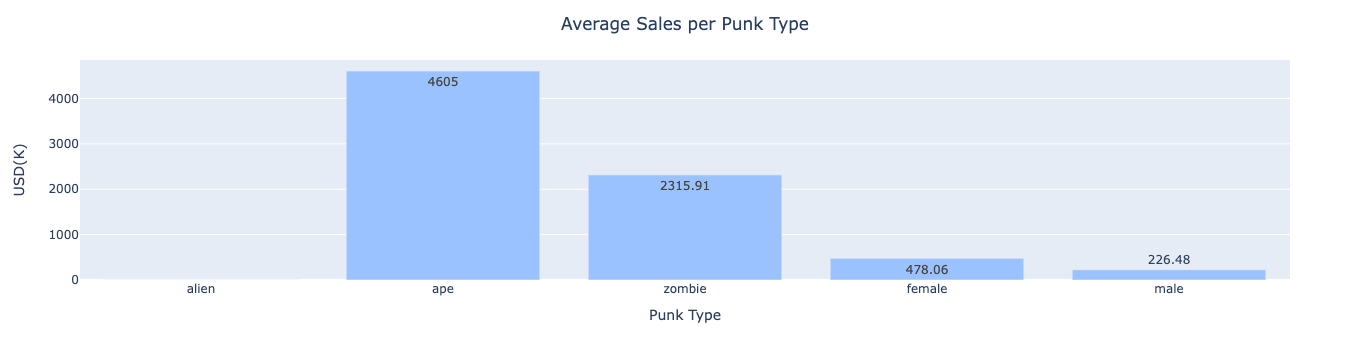

In [138]:
# bar plot of average sales (in last 6 months) per punk type
type_names = ['alien', 'ape', 'zombie', 'female', 'male']

fig = px.bar(indiv, 
             x= type_names,
             y= [0, 4605.00, 2315.91, 478.06, 226.48],
             text = [0, 4605, 2315.91, 478.06, 226.48],
             color_discrete_sequence = ['#99c2ff'],
             labels={'x': 'Punk Type', 'y': 'USD(K)'})
fig.update_layout(title = 'Average Sales per Punk Type', title_x=.5)
fig.show()

In [26]:
alien_df['avg_usd_bid'].mean()

12421.311633374216

In [27]:
ape_df['avg_usd_bid'].mean()

808.3970547685185

In [28]:
zombie_df['avg_usd_bid'].mean()

681.7718904181547

In [29]:
female_df['avg_usd_bid'].mean()

174.59617978377946

In [30]:
male_df['avg_usd_bid'].mean()

220.03205512428534

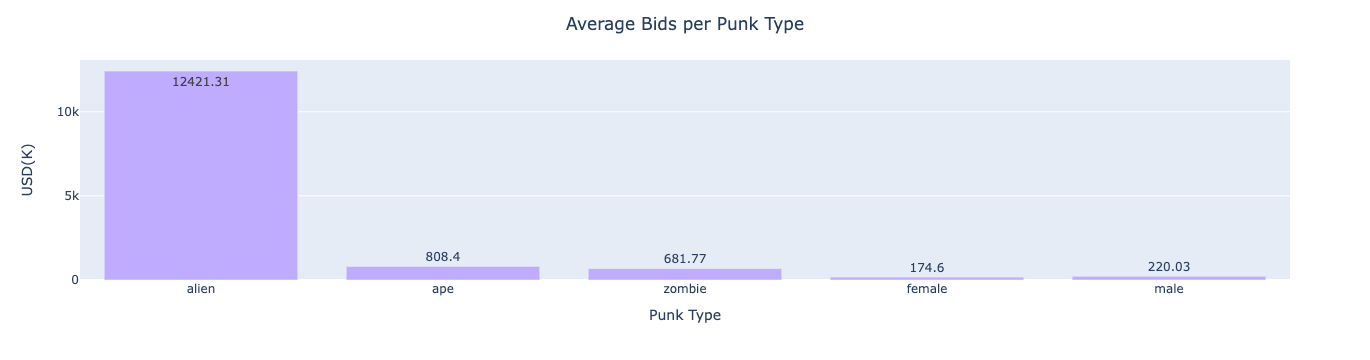

In [139]:
# bar plot of average bids (in last 6 months) per punk type
fig = px.bar(indiv, 
             x= type_names,
             y= [12421.31, 808.40, 681.77, 174.60, 220.03],
             text = [12421.31, 808.40, 681.77, 174.60, 220.03],
             color_discrete_sequence = ['#bfacff'],
             labels={'x': 'Punk Type', 'y': 'USD(K)'})
fig.update_layout(title = 'Average Bids per Punk Type', title_x=.5)
fig.show()

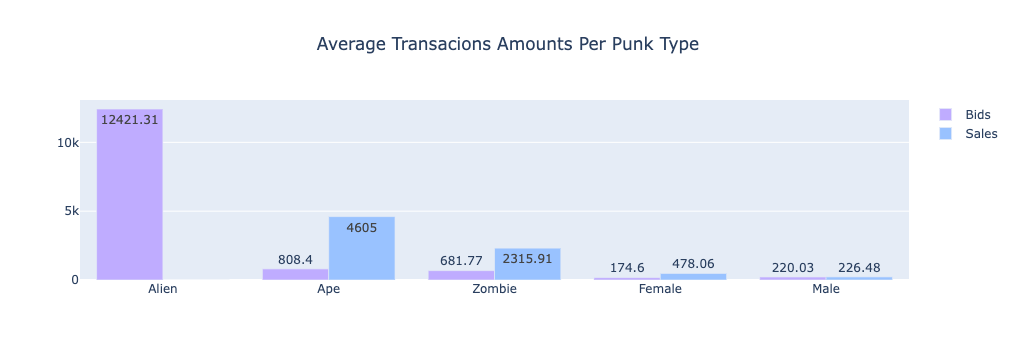

In [141]:
# citation: https://plotly.com/python/bar-charts/
type_names = ['Alien', 'Ape', 'Zombie', 'Female', 'Male']

fig = go.Figure(data=[
    go.Bar(name='Bids', 
           x=type_names,
           y= [12421.31, 808.40, 681.77, 174.60, 220.03],
           text = [12421.31, 808.40, 681.77, 174.60, 220.03],
           marker = {'color': '#bfacff'}), 
    go.Bar(name='Sales',
           x=type_names,
           y= [0, 4605.00, 2315.91, 478.06, 226.48],
           text = [0, 4605, 2315.91, 478.06, 226.48],
           marker = {'color': '#99c2ff'})
    
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Average Transacions Amounts Per Punk Type', title_x=.5)
fig.show()

In [32]:
alien_df['avg_usd_offer'].mean()

156798.3333333333

In [33]:
ape_df['avg_usd_offer'].mean()

61055.11688311689

In [34]:
zombie_df['avg_usd_offer'].mean()

5539.059378693529

In [35]:
female_df['avg_usd_offer'].mean()

772.4948206698674

In [36]:
male_df['avg_usd_offer'].mean()

3406.257727964973

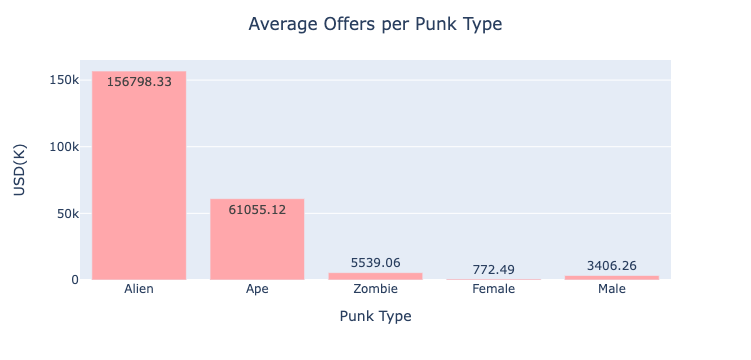

In [55]:
# bar plot of average offers (in last 6 months) per punk type
fig = px.bar(indiv, 
             x= type_names,
             y= [156798.33, 61055.12, 5539.06, 772.49, 3406.26],
             text = [156798.33, 61055.12, 5539.06, 772.49, 3406.26],
             color_discrete_sequence = ['#ffa7ab'],
             labels={'x': 'Punk Type', 'y': 'USD(K)'})
fig.update_layout(title = 'Average Offers per Punk Type', title_x=.5)
fig.show()

### 5. Analyze Accessory Info

In [77]:
# sort values by amount
acc_sorted = accessory.sort_values(by = 'amount')

In [78]:
acc_sorted

,accessory,amount,rarity,rarity_score
2,beanie,44,0.0044,227.272727
13,choker,48,0.0048,208.333333
57,pilot helmet,54,0.0054,185.185185
78,tiara,55,0.0055,181.818182
54,orange side,68,0.0068,147.058824
...,...,...,...,...
48,mole,644,0.0644,15.527950
63,purple lipstick,655,0.0655,15.267176
40,hot lipstick,696,0.0696,14.367816
14,cigarette,961,0.0961,10.405827


In [79]:
# top ten most rare accessories
rare_acc = acc_sorted[0:5]
rare_acc

,accessory,amount,rarity,rarity_score
2,beanie,44,0.0044,227.272727
13,choker,48,0.0048,208.333333
57,pilot helmet,54,0.0054,185.185185
78,tiara,55,0.0055,181.818182
54,orange side,68,0.0068,147.058824


In [80]:
# top ten least rare accessories
unrare_acc = acc_sorted.tail(5)
unrare_acc

,accessory,amount,rarity,rarity_score
48,mole,644,0.0644,15.527950
63,purple lipstick,655,0.0655,15.267176
40,hot lipstick,696,0.0696,14.367816
14,cigarette,961,0.0961,10.405827
24,earring,2459,0.2459,4.066694


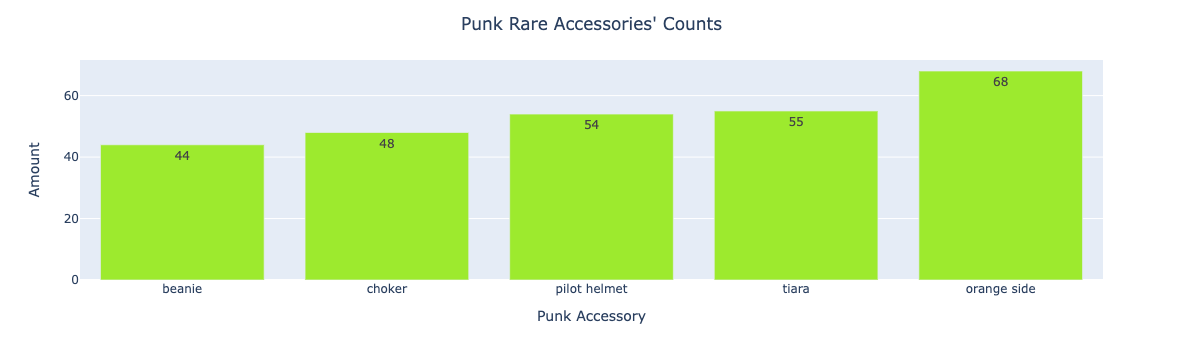

In [88]:
# converting rare info to lists for bar plot
accessories = list(rare_acc['accessory'])
acc_amount = list(rare_acc['amount'])

# bar plot of punk type counts
fig = px.bar(rare_acc, 
             x= accessories,
             y= acc_amount,  
             text = acc_amount,
             color_discrete_sequence = ['#9DEA2E'],
             labels={'x': 'Punk Accessory', 'y': 'Amount'})
fig.update_layout(title = "Punk Rare Accessories' Counts", title_x=.5)
fig.show()

In [82]:
# add average sale amounts of cryptopunks with these accessories 
# add average bid amounts of cryptopunks with these accessories 

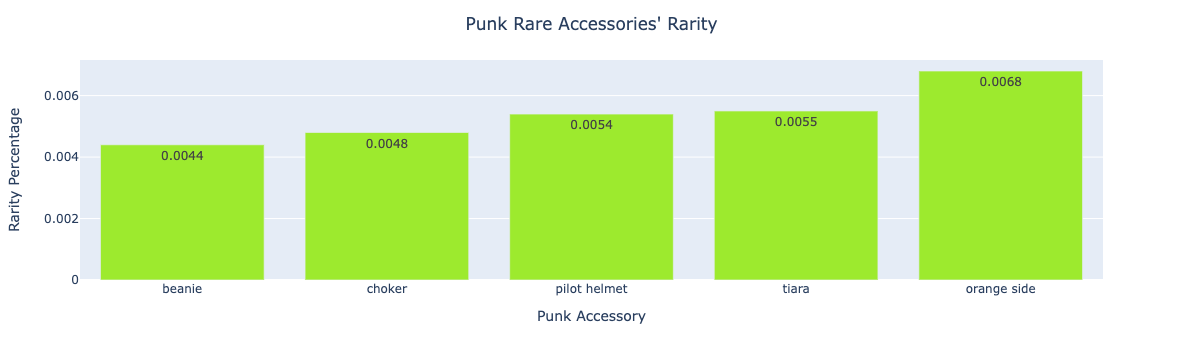

In [87]:
# converting rare info to lists for bar plot
accessories = list(rare_acc['accessory'])
acc_rarity = list(rare_acc['rarity'])

# bar plot of punk type counts
fig = px.bar(rare_acc, 
             x= accessories,
             y= acc_rarity,  
             text = acc_rarity,
             color_discrete_sequence = ['#9DEA2E'],
             labels={'x': 'Punk Accessory', 'y': 'Rarity Percentage'})
fig.update_layout(title = "Punk Rare Accessories' Rarity", title_x=.5)
fig.show()

In [98]:
# add average sale amounts of cryptopunks with these accessories 
# add average bid amounts of cryptopunks with these accessories 

In [118]:
beanie_df = indiv[indiv['beanie'] == 1]
beanie_df['avg_usd_bid'].mean()

668.6459854978356

In [119]:
choker_df = indiv[indiv['choker'] == 1]
choker_df['avg_usd_bid'].mean()

306.045125

In [120]:
pilot_df = indiv[indiv['pilot helmet'] == 1]
pilot_df['avg_usd_bid'].mean()

468.97547902255627

In [121]:
tiara_df = indiv[indiv['tiara'] == 1]
tiara_df['avg_usd_bid'].mean()

190.0069046516755

In [122]:
orange_df = indiv[indiv['orange side'] == 1]
orange_df['avg_usd_bid'].mean()

332.1682696741854

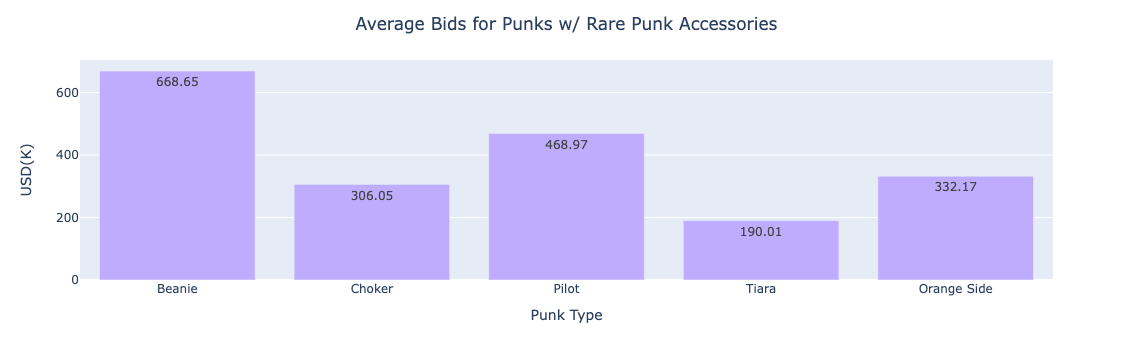

In [123]:
rare_acc_names = ['beanie', 'choker', 'pilot', 'tiara', 'orange side']
fig = px.bar(indiv, 
             x= rare_acc_names,
             y= [668.65, 306.05, 468.97, 190.01, 332.17],
             text = [668.65, 306.05, 468.97, 190.01, 332.17],
             color_discrete_sequence = ['#bfacff'],
             labels={'x': 'Punk Type', 'y': 'USD(K)'})
fig.update_layout(title = 'Average Bids for Punks w/ Rare Punk Accessories', title_x=.5)
fig.show()

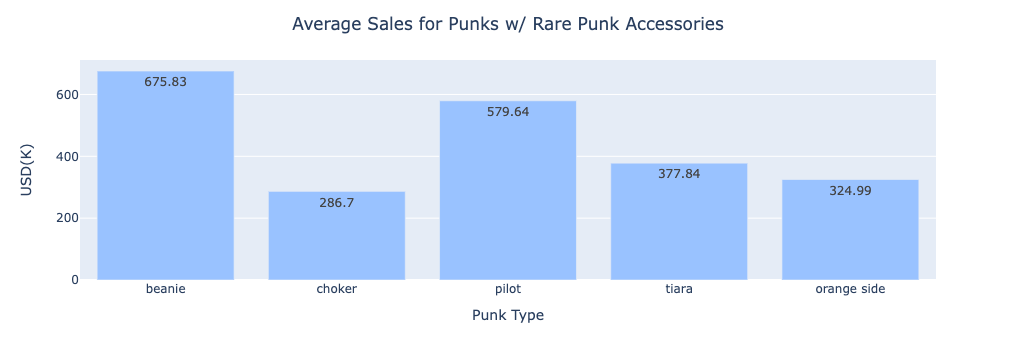

In [140]:
rare_acc_names = ['beanie', 'choker', 'pilot', 'tiara', 'orange side']
fig = px.bar(indiv, 
             x= rare_acc_names,
             y= [675.83, 286.70, 579.64, 377.84, 324.99],
             text = [675.83, 286.70, 579.64, 377.84, 324.99],
             color_discrete_sequence = ['#99c2ff'],
             labels={'x': 'Punk Type', 'y': 'USD(K)'})
fig.update_layout(title = 'Average Sales for Punks w/ Rare Punk Accessories', title_x=.5)
fig.show()

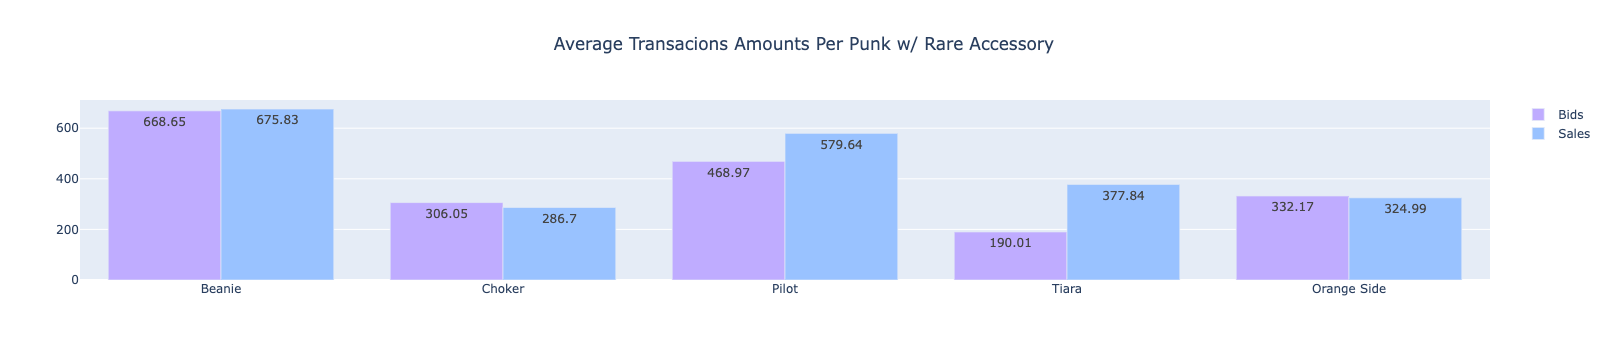

In [136]:
# citation: https://plotly.com/python/bar-charts/
rare_acc_names = ['Beanie', 'Choker', 'Pilot', 'Tiara', 'Orange Side']

fig = go.Figure(data=[
    go.Bar(name='Bids', 
           x=rare_acc_names,
           y= [668.65, 306.05, 468.97, 190.01, 332.17],
           text = [668.65, 306.05, 468.97, 190.01, 332.17],
           marker = {'color': '#bfacff'}), 
    go.Bar(name='Sales',
           x=rare_acc_names,
           y= [675.83, 286.70, 579.64, 377.84, 324.99],
           text = [675.83, 286.70, 579.64, 377.84, 324.99],
           marker = {'color': '#99c2ff'})
    
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'Average Transacions Amounts Per Punk w/ Rare Accessory', title_x=.5)
fig.show()

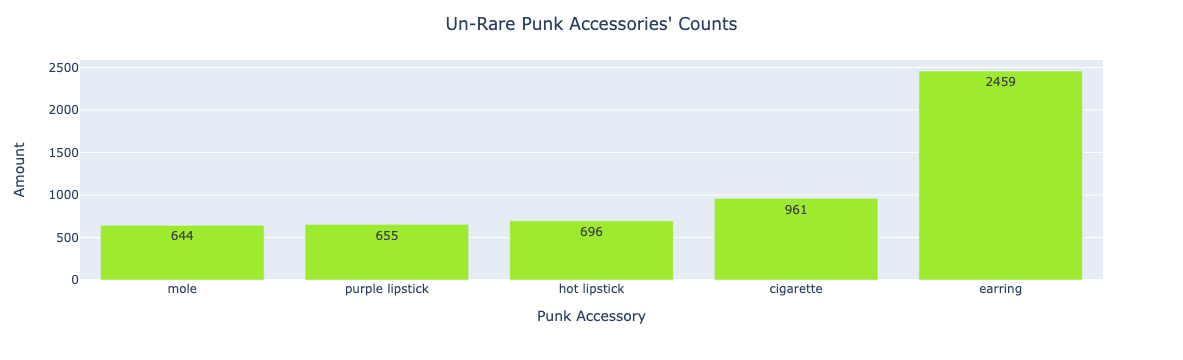

In [111]:
# converting nonrare info to lists for bar plot
accessories = list(unrare_acc['accessory'])
acc_amount = list(unrare_acc['amount'])

# bar plot of punk type counts
fig = px.bar(unrare_acc, 
             x= accessories,
             y= acc_amount,  
             text = acc_amount,
             color_discrete_sequence = ['#9DEA2E'],
             labels={'x': 'Punk Accessory', 'y': 'Amount'})
fig.update_layout(title = "Un-Rare Punk Accessories' Counts", title_x=.5)
fig.show()

In [204]:
rarity.describe()

,punk_id,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,...,vr,welding goggles,wild blonde,wild hair,wild white hair,accessory_total,skin_color,type,total_rarity_score,rounded_scores
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,4.000000,5.000000,104.000000,103.999998
std,2886.89568,5.828244,4.448820,15.043117,8.215832,4.206347,3.899869,8.187424,8.747973,6.049599,...,5.396610,10.737346,8.273529,4.623148,8.516846,110.447520,40.330994,40.259611,143.795619,143.795589
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.221729,1.012248,1.655903,19.949661,19.950000
25%,2499.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.221729,1.012248,1.655903,65.124199,65.122500
50%,4999.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.808989,1.012248,1.655903,88.471016,88.470000
75%,7499.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.808989,1.012248,2.604167,114.107407,114.107500
max,9999.00000,34.965035,20.790021,227.272727,68.493151,18.691589,16.207455,68.027211,77.519380,37.593985,...,30.120482,116.279070,69.444444,22.371365,73.529412,10000.000000,1111.111111,1111.111111,10336.243742,10336.240000


In [91]:
# add average sale amounts of cryptopunks with these accessories 
mole_df = indiv[indiv['mole'] == 1]
mole_df['avg_usd_sale'].mean()

200.16174521756977

In [92]:
purp_lipstick_df = indiv[indiv['purple lipstick'] == 1]
purp_lipstick_df['avg_usd_sale'].mean()

249.24006107954546

In [93]:
hot_lipstick_df = indiv[indiv['hot lipstick'] == 1]
hot_lipstick_df['avg_usd_sale'].mean()

210.974598707672

In [94]:
cigarette_df = indiv[indiv['cigarette'] == 1]
cigarette_df['avg_usd_sale'].mean()

240.85557198591204

In [95]:
earring_df = indiv[indiv['earring'] == 1]
earring_df['avg_usd_sale'].mean()

218.58841102403971

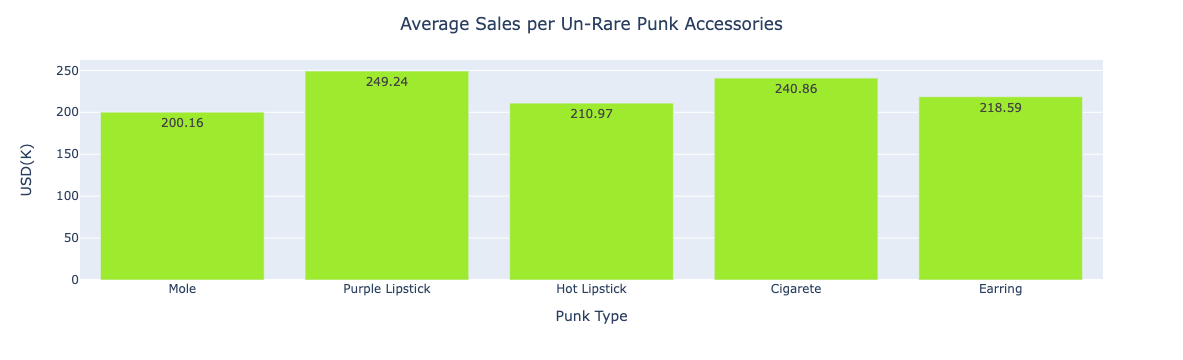

In [97]:
un_acc_names = ['Mole', 'Purple Lipstick', 'Hot Lipstick', 'Cigarete', 'Earring']
fig = px.bar(indiv, 
             x= un_acc_names,
             y= [200.16, 249.24, 210.97, 240.86, 218.59],
             text = [200.16, 249.24, 210.97, 240.86, 218.59],
             color_discrete_sequence = ['#9DEA2E'],
             labels={'x': 'Punk Type', 'y': 'USD(K)'})
fig.update_layout(title = 'Average Sales per Un-Rare Punk Accessories', title_x=.5)
fig.show()

In [76]:
# add average bid amounts of cryptopunks with these accessories 

### 6. Analyze Rarity Scores

In [49]:
# look at most rare punks and see average sale amount 
# look at most rare punks and see average bid amount 

In [51]:
def get_rarity_score(punk_id):
    return round(rarity['total_rarity_score'].iloc[punk_id], 2)

In [52]:
get_rarity_score(7804)

2321.81

### 7. Analyze Most Expensive Sales

In [129]:
# largest sales dataframe
sold = trans[trans['trans'] == "Sold"]
most_expensive = sold.sort_values(by = 'usd', ascending=False).head(6)

In [131]:
most_expensive = most_expensive.iloc[1:, :]

In [132]:
most_expensive

,usd,date,trans,punk_id,accessories,type
108574,7580.0,2021-03-11,Sold,3100,['Headband'],alien
51298,7570.0,2021-03-11,Sold,7804,"['Cap Forward', 'Pipe', 'Small Shades']",alien
33827,6630.0,2021-09-11,Sold,8857,"['Wild Hair', '3D Glasses']",zombie
77340,5450.0,2021-07-30,Sold,5217,"['Gold Chain', 'Knitted Cap']",ape
41269,5330.0,2021-08-24,Sold,7252,"['Chinstrap', 'Earring', 'Crazy Hair']",zombie


In [134]:
rarity[rarity['punk_id'] == 3100]
# 2276.882794

,punk_id,accessories,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,...,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,accessory_total,skin_color,type,total_rarity_score
3100,3100,['Headband'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30.03003,1111.111111,1111.111111,2276.882794


In [142]:
rarity[rarity['punk_id'] == 7804]
# 2321.814797

,punk_id,accessories,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,...,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,accessory_total,skin_color,type,total_rarity_score
7804,7804,"['Cap Forward', 'Pipe', 'Small Shades']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.221729,1111.111111,1111.111111,2321.814797


In [146]:
rarity[rarity['punk_id'] == 8857]
#287.418116

,punk_id,accessories,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,...,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,accessory_total,skin_color,type,total_rarity_score
8857,8857,"['Wild Hair', '3D Glasses']",34.965035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,22.371365,0.0,2.808989,113.636364,113.636364,287.418116


In [144]:
rarity[rarity['punk_id'] == 5217]
# 919.180268

,punk_id,accessories,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,...,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,accessory_total,skin_color,type,total_rarity_score
5217,5217,"['Gold Chain', 'Knitted Cap']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.808989,416.666667,416.666667,919.180268


In [147]:
rarity[rarity['punk_id'] == 7252]
#293.176732

,punk_id,accessories,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,...,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,accessory_total,skin_color,type,total_rarity_score
7252,7252,"['Chinstrap', 'Earring', 'Crazy Hair']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.221729,113.636364,113.636364,293.176732


In [148]:
rarity.describe()

,punk_id,3d glasses,bandana,beanie,big beard,big shades,black lipstick,blonde bob,blonde short,blue eye shadow,...,vape,vr,welding goggles,wild blonde,wild hair,wild white hair,accessory_total,skin_color,type,total_rarity_score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,4.000000,5.000000,104.000000
std,2886.89568,5.828244,4.448820,15.043117,8.215832,4.206347,3.899869,8.187424,8.747973,6.049599,...,5.980659,5.396610,10.737346,8.273529,4.623148,8.516846,110.447520,40.330994,40.259611,143.795619
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221729,1.012248,1.655903,19.949661
25%,2499.75000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.221729,1.012248,1.655903,65.124199
50%,4999.50000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.808989,1.012248,1.655903,88.471016
75%,7499.25000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.808989,1.012248,2.604167,114.107407
max,9999.00000,34.965035,20.790021,227.272727,68.493151,18.691589,16.207455,68.027211,77.519380,37.593985,...,36.764706,30.120482,116.279070,69.444444,22.371365,73.529412,10000.000000,1111.111111,1111.111111,10336.243742


In [149]:
most_expensive

,usd,date,trans,punk_id,accessories,type
108574,7580.0,2021-03-11,Sold,3100,['Headband'],alien
51298,7570.0,2021-03-11,Sold,7804,"['Cap Forward', 'Pipe', 'Small Shades']",alien
33827,6630.0,2021-09-11,Sold,8857,"['Wild Hair', '3D Glasses']",zombie
77340,5450.0,2021-07-30,Sold,5217,"['Gold Chain', 'Knitted Cap']",ape
41269,5330.0,2021-08-24,Sold,7252,"['Chinstrap', 'Earring', 'Crazy Hair']",zombie


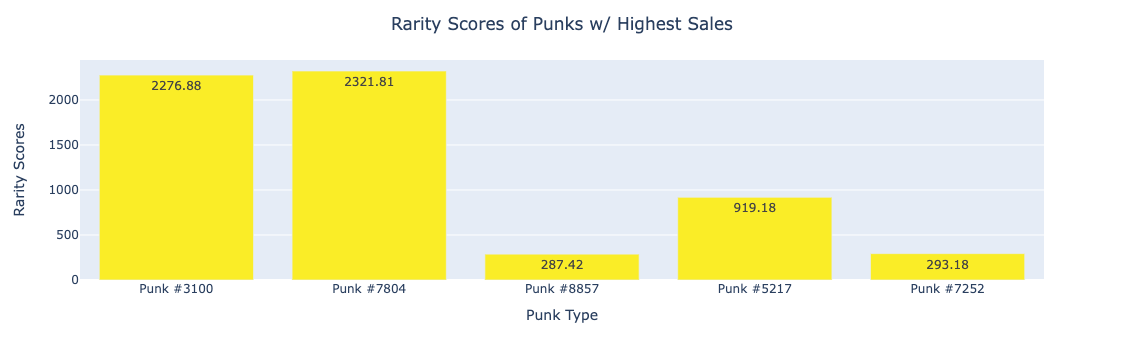

In [153]:
big_sales_punks = ['Punk #3100', 'Punk #7804', 'Punk #8857', 'Punk #5217', 'Punk #7252']
fig = px.bar(indiv, 
             x= big_sales_punks,
             y= [2276.88, 2321.81, 287.42, 919.18, 293.18],
             text = [2276.88, 2321.81, 287.42, 919.18, 293.18],
             color_discrete_sequence = ['#faed27'],
             labels={'x': 'Punk Type', 'y': 'Rarity Scores'})
fig.update_layout(title = 'Rarity Scores of Punks w/ Highest Sales', title_x=.5)
fig.show()

In [35]:
# what are the rarity scores of the ten most expensive sales?

### 8. Analyze Timeline of Transactions

In [43]:
trans.rename(columns = {'punk_id': 'id'}, inplace = True)

In [44]:
trans

,usd,date,trans,id,accessories,type
0,401.264,2021-08-30,Sold,9001,"['Clown Nose', 'Bandana', 'Nerd Glasses']",female
1,383.662,2021-08-30,Sold,9001,"['Clown Nose', 'Bandana', 'Nerd Glasses']",female
2,19.230,2021-02-17,Sold,9001,"['Clown Nose', 'Bandana', 'Nerd Glasses']",female
3,2.085,2020-10-03,Sold,9001,"['Clown Nose', 'Bandana', 'Nerd Glasses']",female
4,0.085,2019-05-06,Sold,9001,"['Clown Nose', 'Bandana', 'Nerd Glasses']",female
...,...,...,...,...,...,...
167553,0.340,2020-01-14,Bid Withdrawn,499,"['Welding Goggles', 'Straight Hair Blonde', 'C...",female
167554,0.241,2020-01-07,Bid Withdrawn,499,"['Welding Goggles', 'Straight Hair Blonde', 'C...",female
167555,0.241,2020-01-06,Bid Withdrawn,499,"['Welding Goggles', 'Straight Hair Blonde', 'C...",female
167556,NaN,2017-06-23,Claimed,499,"['Welding Goggles', 'Straight Hair Blonde', 'C...",female


In [45]:
trans['id'].value_counts()

4130    165
7569    155
3653    153
5272    141
8697    139
       ... 
1195      1
1199      1
1206      1
1207      1
500       1
Name: id, Length: 10000, dtype: int64

In [156]:
trans.rename(columns = {'id': 'punk_id'}, inplace= True)

In [159]:
# citation: https://plotly.com/python/time-series/

def plot_punk_transactions(id):
    
    # dataframe for single punk
    punk = trans[trans['punk_id'] == id]
    punk['date'] = pd.to_datetime(punk['date'])
    punk_trans = punk[(punk['trans'] == 'Sold') | (punk['trans'] == 'Bid') | (punk['trans'] == 'Offered')]

    # separate dataframes sales, bids, and offers
    punk_sold = punk_trans[punk_trans['trans'] == 'Sold']
    punk_bid = punk_trans[punk_trans['trans'] == 'Bid']
    punk_offered = punk_trans[punk_trans['trans'] == 'Offered']
    
    df = punk_trans
    fig = px.line(df, x="date", y=df['usd'].apply(pd.to_numeric),
                  hover_data={"date": "|%B %d, %Y"},
                  labels={'y': 'USD(K)', 'date': 'Date', 'trans': 'Transaction'},
                  #text = df['usd']
                  markers = True,
                  color = 'trans',
                  color_discrete_map = {'Sold': '#99c2ff', 'Bid': '#bfacff', 'Offered': '#ffa7ab'}
                 )

    fig.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y",
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([dict(count=1, label="1 month", step="month", stepmode="backward"),
                          dict(count=6, label="6 months", step="month", stepmode="backward"),
                          dict(count=1, label="Year to Date", step="year", stepmode="todate"),
                          dict(count=1, label="1 Year", step="year", stepmode="backward"),
                          dict(label= 'All', step="all")])
        ))
    

    fig.update_layout(title = 'All Transactions', title_x=.5)
    fig.show()

    # first plot: sales
    df_1 = punk_sold
    fig_1 = px.line(df_1, x="date", y=df_1['usd'].apply(pd.to_numeric),
                  hover_data={"date": "|%B %d, %Y"},
                  labels={'y': 'USD(K)', 'date': 'Date'},
                  #text = df['usd']
                  markers = True,
                 )

    fig_1.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y",
        #color = '#FF10F0',
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([dict(count=1, label="1 month", step="month", stepmode="backward"),
                          dict(count=6, label="6 months", step="month", stepmode="backward"),
                          dict(count=1, label="Year to Date", step="year", stepmode="todate"),
                          dict(count=1, label="1 Year", step="year", stepmode="backward"),
                          dict(label= 'All', step="all")])
        ))

    fig_1.update_traces(line_color='#99c2ff') 
    fig_1.update_layout(title = 'Sold Transactions', title_x=.5)
    fig_1.show()

    # second plot: bids
    df_2 = punk_bid
    fig_2 = px.line(df_2, x="date", y=df_2['usd'].apply(pd.to_numeric),
                  hover_data={"date": "|%B %d, %Y"},
                  labels={'y': 'USD(K)', 'date': 'Date'},
                  #text = df['usd']
                  markers = True,
                 )

    fig_2.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y",
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([dict(count=1, label="1 month", step="month", stepmode="backward"),
                          dict(count=6, label="6 months", step="month", stepmode="backward"),
                          dict(count=1, label="Year to Date", step="year", stepmode="todate"),
                          dict(count=1, label="1 Year", step="year", stepmode="backward"),
                          dict(label= 'All', step="all")])
        ))

    fig_2.update_traces(line_color='#bfacff')
    fig_2.update_layout(title = 'Bid Transactions', title_x=.5)
    fig_2.show()
    
    # third plot: offers
    df_3 = punk_offered
    fig_3 = px.line(df_3, x="date", y=df_3['usd'].apply(pd.to_numeric),
                  hover_data={"date": "|%B %d, %Y"},
                  labels={'y': 'USD(K)', 'date': 'Date'},
                  #text = df['usd']
                  markers = True,
                 )

    fig_3.update_xaxes(
        dtick="M1",
        tickformat="%b\n%Y",
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([dict(count=1, label="1 month", step="month", stepmode="backward"),
                          dict(count=6, label="6 months", step="month", stepmode="backward"),
                          dict(count=1, label="Year to Date", step="year", stepmode="todate"),
                          dict(count=1, label="1 Year", step="year", stepmode="backward"),
                          dict(label= 'All', step="all")])
        ))

    fig_3.update_traces(line_color='#ffa7ab')
    fig_3.update_layout(title = 'Offered Transactions', title_x=.5)
    fig_3.show()

/var/folders/j5/_vk8rntd5blc5cd__7h03h0c0000gn/T/ipykernel_15261/1215260414.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



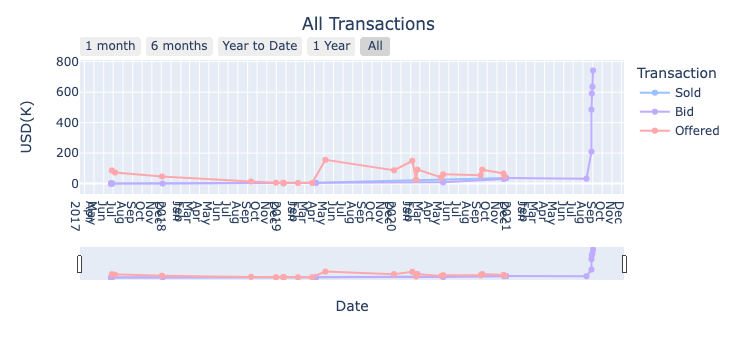

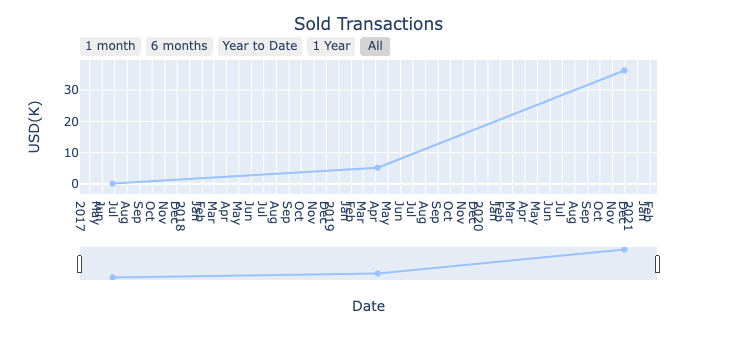

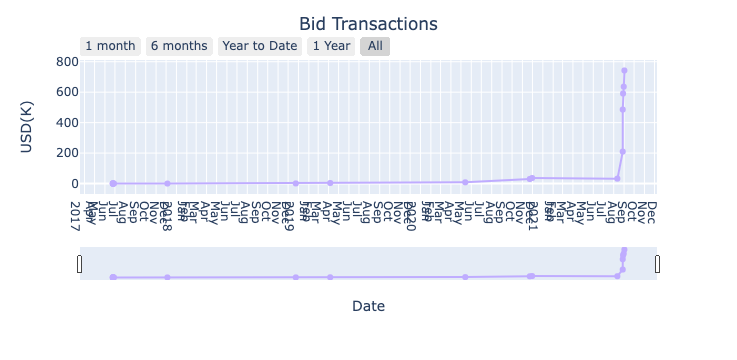

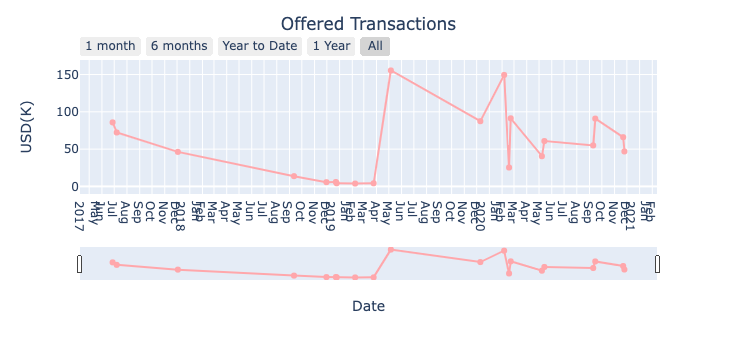

In [160]:
plot_punk_transactions(1)

In [360]:
# 780

### Heatmaps

In [ ]:
#make sure you use extra edited indiv for this heatmap
C_mat = indiv.drop(columns = {'recent_usd_sale', 'avg_usd_sale', 'avg_usd_bid', 'max_usd_bid', 'avg_usd_offer', 'max_usd_offer'}).corr()
fig = plt.figure(figsize = (50,50))

sns.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(indiv.corr()[['recent_usd_sale']].sort_values(by='recent_usd_sale', ascending=False), annot=True);

### Popular Words Charts

In [188]:
# largest sales dataframe
sold = trans[trans['trans'] == "Sold"]
most_expensive = sold.sort_values(by = 'usd', ascending=False).head(20)

In [189]:
most_expensive

,usd,date,trans,punk_id,accessories,type
18434,532410.0,2021-10-28,Sold,9998,"['Wild White Hair', 'Black Lipstick', 'Clown E...",female
108574,7580.0,2021-03-11,Sold,3100,['Headband'],alien
51298,7570.0,2021-03-11,Sold,7804,"['Cap Forward', 'Pipe', 'Small Shades']",alien
33827,6630.0,2021-09-11,Sold,8857,"['Wild Hair', '3D Glasses']",zombie
77340,5450.0,2021-07-30,Sold,5217,"['Gold Chain', 'Knitted Cap']",ape
41269,5330.0,2021-08-24,Sold,7252,"['Chinstrap', 'Earring', 'Crazy Hair']",zombie
59687,5120.0,2021-09-04,Sold,6275,"['Shadow Beard', 'Mohawk Dark']",zombie
130547,4320.0,2021-08-06,Sold,2338,['Mohawk Thin'],zombie
59688,3890.0,2021-09-04,Sold,6275,"['Shadow Beard', 'Mohawk Dark']",zombie
127208,3760.0,2021-07-30,Sold,2140,"['Knitted Cap', 'Small Shades']",ape


In [198]:
neareast_neighbors

,punk_id,accessories,type,clean_accessories,neighbors,neighbors_clean
0,0,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",female,female 'green eye shadow' 'earring' 'blonde bob',"[[184, 0.964], [3582, 0.964], [9431, 0.964], [...","[[184, 0.964], [3582, 0.964], [9431, 0.964], [..."
1,1,"['Smile', 'Mohawk']",male,male 'smile' 'mohawk',"[[7591, 0.923], [24, 0.8664], [3288, 0.8664], ...","[[7591, 0.923], [24, 0.8664], [3288, 0.8664], ..."
2,2,['Wild Hair'],female,female 'wild hair',"[[200, 1.0], [566, 1.0], [3412, 1.0], [97, 0.8...","[[200, 1.0], [566, 1.0], [3412, 1.0], [97, 0.8..."
3,3,"['Wild Hair', 'Nerd Glasses', 'Pipe']",male,male 'wild hair' 'nerd glasses' 'pipe',"[[723, 0.8287], [3937, 0.8287], [5091, 0.8287]...","[[723, 0.8287], [3937, 0.8287], [5091, 0.8287]..."
4,4,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",male,male 'big shades' 'wild hair' 'earring' 'goat',"[[7599, 0.8322], [8459, 0.8322], [3751, 0.8307...","[[7599, 0.8322], [8459, 0.8322], [3751, 0.8307..."
...,...,...,...,...,...,...
9995,9995,"['Purple Eye Shadow', 'Straight Hair Dark']",female,female 'purple eye shadow' 'straight hair dark',"[[5844, 1.0], [3615, 0.9578], [729, 0.9098], [...","[[5844, 1.0], [3615, 0.9578], [729, 0.9098], [..."
9996,9996,"['Cigarette', 'Earring', 'Crazy Hair', 'Smile']",male,male 'cigarette' 'earring' 'crazy hair' 'smile',"[[8393, 0.9534], [495, 0.8561], [1049, 0.8561]...","[[8393, 0.9534], [495, 0.8561], [1049, 0.8561]..."
9997,9997,"['Front Beard', 'Cap Forward']",zombie,zombie 'front beard' 'cap forward',"[[6491, 0.8235], [8553, 0.7275], [9909, 0.7008...","[[6491, 0.8235], [8553, 0.7275], [9909, 0.7008..."
9998,9998,"['Wild White Hair', 'Black Lipstick', 'Clown E...",female,female 'wild white hair' 'black lipstick' 'clo...,"[[4424, 0.9268], [4086, 0.8919], [7083, 0.8919...","[[4424, 0.9268], [4086, 0.8919], [7083, 0.8919..."


In [199]:
most_expensive['clean_accessories'] = neareast_neighbors['neighbors_clean']

In [200]:
def get_popular_words(df, column_name, num):
    X = df[column_name]
    
    # some common words that I went to exclude from being in the popular word list
    extra_stops = pd.array([])
    
    # instance of count vectorizer, combines stop words and extra stop words
    cvect_nostop = CountVectorizer(stop_words = text.ENGLISH_STOP_WORDS.union(extra_stops))
    
    #fit it
    X_no_stop = cvect_nostop.fit_transform(X.apply(lambda x: np.str_(x)))
    
    #examine the words
    crypto_text_nostop = pd.DataFrame(X_no_stop.toarray(), columns = cvect_nostop.get_feature_names_out())
    
    return pd.DataFrame(crypto_text_nostop.sum().sort_values().tail(num))

In [201]:
punk_popular_words = get_popular_words(most_expensive, 'clean_accessories', 10)

In [202]:
punk_popular_words

,0
1892,1
1960,1
4049,1
582,1
611,1
789,1
968,1
7605,3
8201,4
nan,19


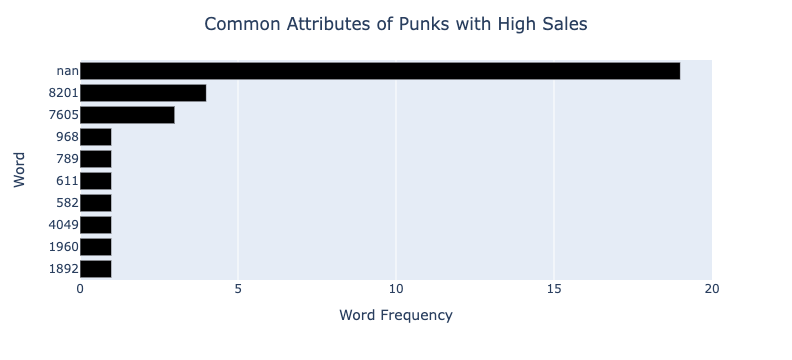

In [203]:
fig = px.bar(punk_popular_words, 
             orientation='h',
             y=punk_popular_words.index,
             x=punk_popular_words[0], 
             color_discrete_sequence = ['black'],
             labels={'0': 'Word Frequency', 'index': 'Word'}
            )

fig.update_layout(title = 'Common Attributes of Punks with High Sales', title_x=.5, yaxis = dict(tick0 = 0.5, dtick = 0.75))
fig.show()